In [21]:
import pandas as pd
import numpy as np
from ltp import LTP
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [3]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
df = pd.read_csv('items.csv', encoding='gbk')

In [25]:
len(df['CONTENT'])

4578

In [5]:
#加载常用词
f=open('stopWord.txt', encoding='utf-8')
stopwords=[]
for line in f:
    stopwords.append(line.strip())
poslist = ['n', 'nz', 'v', 'vd', 'vn', 'l', 'a', 'd']

In [6]:
content_frame = df['CONTENT']
ltp = LTP()

In [7]:
def prepare_data(df,stopwords):
    data =[]
    seg,hidden = ltp.seg([df])
    pos = ltp.pos(hidden)[0]
    for index,value in enumerate(seg[0]):
        if value not in stopwords and pos[index] in poslist:
            data.append(value)
    return data

In [8]:
# for i in content_frame:
#     prepare_data(i, stopwords)
corpus = []
for i in content_frame:
    a = prepare_data(i, stopwords)
#     b = ' '.join(a)
    for j in a:
        corpus.append(j)

In [14]:
corpus[1]

'屏幕'

In [16]:
b = ' '.join(corpus)

In [67]:
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(corpus) 
# # 2、统计每 个词的tf-idf权值
# transformer = TfidfTransformer()
# tfidf = transformer.fit_transform(X)
# # 3、获取词袋模型中的关键词
# word = vectorizer.get_feature_names()
# # 4、获取tf-idf矩阵，a[i][j]表示j词在i篇文本中的tf-idf权重
# weight = tfidf.toarray()

In [11]:
# from collections import Counter
# Counter(corpus).most_common(20)

[('买', 1869),
 ('手机', 1427),
 ('问题', 709),
 ('说', 592),
 ('差', 563),
 ('降价', 521),
 ('客服', 503),
 ('屏幕', 479),
 ('苹果', 381),
 ('退', 362),
 ('好', 360),
 ('换', 343),
 ('太', 317),
 ('月', 288),
 ('售', 276),
 ('货', 257),
 ('时间', 230),
 ('退货', 224),
 ('送', 223),
 ('外观', 220)]

(-0.5, 399.5, 199.5, -0.5)

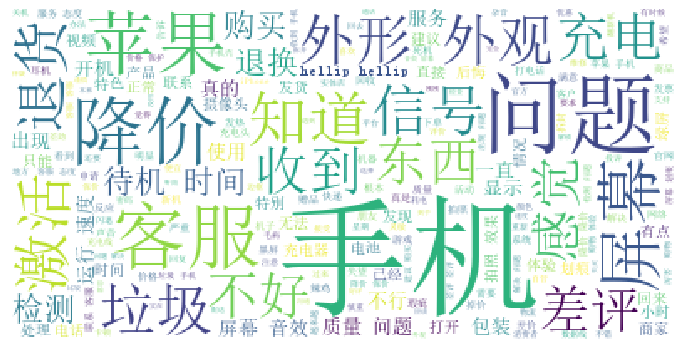

In [17]:
word_cloud = WordCloud(font_path="simsun.ttc",  # 设置词云字体
                       background_color="white", # 词云图的背景颜色
                       stopwords=f) # 去掉的停词
word_cloud.generate(b)

# 运用matplotlib展现结果
plt.subplots(figsize=(12,8))
plt.imshow(word_cloud)
plt.axis("off")